# Naive Bayes

In [ ]:
train = [
    ["just plain boring", "-"],
    ["entirely predictable and lacks energy", "-"],
    ["no surprises and very few laughs", "-"],
    ["very powerful", "+"],
    ["the most fun film of the summer", "+"]
]

test = "predictable with no fun"

In [ ]:
train[0][1]

'-'

In [ ]:
s[0].split()

['the', 'most', 'fun', 'film', 'of', 'the', 'summer']

## Hien thuc bang tay

In [ ]:
vocabulary1 = []
vocabulary_positive = []
vocabulary_negative = []
y_train = []

for s in train:
    if s[1] == "-":
        vocabulary_negative += s[0].split()
    else:
        vocabulary_positive += s[0].split()
    
    vocabulary1 += s[0].split()
    y_train.append(s[1])

vocabulary = set(vocabulary1)

In [ ]:
vocabulary

{'and',
 'boring',
 'energy',
 'entirely',
 'few',
 'film',
 'fun',
 'just',
 'lacks',
 'laughs',
 'most',
 'no',
 'of',
 'plain',
 'powerful',
 'predictable',
 'summer',
 'surprises',
 'the',
 'very'}

In [ ]:
print(len(vocabulary))
print(len(vocabulary_positive))
print(len(vocabulary_negative))

20
9
14


In [ ]:
vocabulary

{'and',
 'boring',
 'energy',
 'entirely',
 'few',
 'film',
 'fun',
 'just',
 'lacks',
 'laughs',
 'most',
 'no',
 'of',
 'plain',
 'powerful',
 'predictable',
 'summer',
 'surprises',
 'the',
 'very'}

In [ ]:
vocabulary_negative

['just',
 'plain',
 'boring',
 'entirely',
 'predictable',
 'and',
 'lacks',
 'energy',
 'no',
 'surprises',
 'and',
 'very',
 'few',
 'laughs']

In [ ]:
vocabulary_positive

['very', 'powerful', 'the', 'most', 'fun', 'film', 'of', 'the', 'summer']

In [ ]:
y_train.count("+")

2

In [ ]:
test.split()

['predictable', 'with', 'no', 'fun']

In [ ]:
vocabulary_positive.count('with')

0

In [ ]:
test_list = test.split()
p_negative = y_train.count("-") / len(y_train) #0.6
p_positive = y_train.count("+") / len(y_train) #0.4

p_test_positive = p_positive
p_test_negative = p_negative

print(test_list)
for t in test_list:
    #print(t)
    if t == "with":
        continue
    p_test_positive *= (vocabulary_positive.count(t)+1) / (len(vocabulary_positive) + len(vocabulary)) #Laplace
    p_test_negative *= (vocabulary_negative.count(t)+1) / (len(vocabulary_negative) + len(vocabulary))

print(p_test_positive)
print(p_test_negative)
if p_test_positive >= p_test_negative:
    print("The class of \"{}\" is +".format(test))
else:
    print("The class of \"{}\" is -".format(test))   

['predictable', 'with', 'no', 'fun']
3.2801672885317154e-05
6.106248727864848e-05
The class of "predictable with no fun" is -


## Hien thuc bang Sklearn

In [ ]:
X_train = []
y_train = []

X_test = [test]

for t in train:
    X_train.append(t[0])
    y_train.append(t[1])

In [ ]:
y_train

['-', '-', '-', '+', '+']

In [ ]:
X_train

['just plain boring',
 'entirely predictable and lacks energy',
 'no surprises and very few laughs',
 'very powerful',
 'the most fun film of the summer']

In [ ]:
test = 'predictable with no fun'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
le = LabelEncoder()

vectorizer.fit(X_train)
le.fit(y_train)

X_train_encoded = vectorizer.transform(X_train)
y_train_encoded = le.transform(y_train)

X_test_encoded = vectorizer.transform([test])

In [ ]:
print(X_test_encoded.toarray())

[[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_encoded,y_train_encoded)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = model.predict(X_test_encoded)

print("The class of \"{}\" is {}".format(test, (y_pred)))

The class of "predictable with no fun" is [1]


## N.gram

In [ ]:
X_train = []
y_train = []

X_test = [test]

for t in train:
    X_train.append(t[0])
    y_train.append(t[1])

In [ ]:
X_train

['just plain boring',
 'entirely predictable and lacks energy',
 'no surprises and very few laughs',
 'very powerful',
 'the most fun film of the summer']

In [ ]:
# 1-gram
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_1_gram = CountVectorizer()
vectorizer_1_gram.fit(X_train)

vectorizer_1_gram.get_feature_names()

['and',
 'boring',
 'energy',
 'entirely',
 'few',
 'film',
 'fun',
 'just',
 'lacks',
 'laughs',
 'most',
 'no',
 'of',
 'plain',
 'powerful',
 'predictable',
 'summer',
 'surprises',
 'the',
 'very']

In [ ]:
X_test_1_gram = vectorizer_1_gram.transform(X_test)

In [ ]:
print(X_test_1_gram)

  (0, 6)	1
  (0, 11)	1
  (0, 15)	1


In [ ]:
def generate_n_gram(text,ngram=1):
  words = [word for word in text.split(" ")]
  temp = zip(*[words[i:] for i in range(0,ngram)])
  result = [' '.join(ngram) for ngram in temp]
  return result

In [ ]:
generate_n_gram('predictable with no fun',ngram=3)

['predictable with no', 'with no fun']

In [ ]:
# 2-gram
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_2_gram = CountVectorizer(analyzer='word', ngram_range=(2, 2))
vectorizer_2_gram.fit(X_train)

vectorizer_2_gram.get_feature_names()

['and lacks',
 'and very',
 'entirely predictable',
 'few laughs',
 'film of',
 'fun film',
 'just plain',
 'lacks energy',
 'most fun',
 'no surprises',
 'of the',
 'plain boring',
 'predictable and',
 'surprises and',
 'the most',
 'the summer',
 'very few',
 'very powerful']

In [ ]:
X_test_2_gram = vectorizer_2_gram.transform(X_test)

In [ ]:
X_test_1_gram

<1x20 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

# KNN

In [ ]:
train = [
    ["just plain boring", "-"],
    ["entirely predictable and lacks energy", "-"],
    ["no surprises and very few laughs", "-"],
    ["very powerful", "+"],
    ["the most fun film of the summer", "+"]
]

test = "predictable with no fun"

In [ ]:
X_train = []
y_train = []

X_test = [test]

for t in train:
    X_train.append(t[0])
    y_train.append(t[1])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
le = LabelEncoder()

vectorizer.fit(X_train)
le.fit(y_train)

X_train_encoded = vectorizer.transform(X_train)
y_train_encoded = le.transform(y_train)

X_test_encoded = vectorizer.transform(X_test)

In [ ]:
X_train_encoded.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0]])

In [ ]:
X_test_encoded.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]])

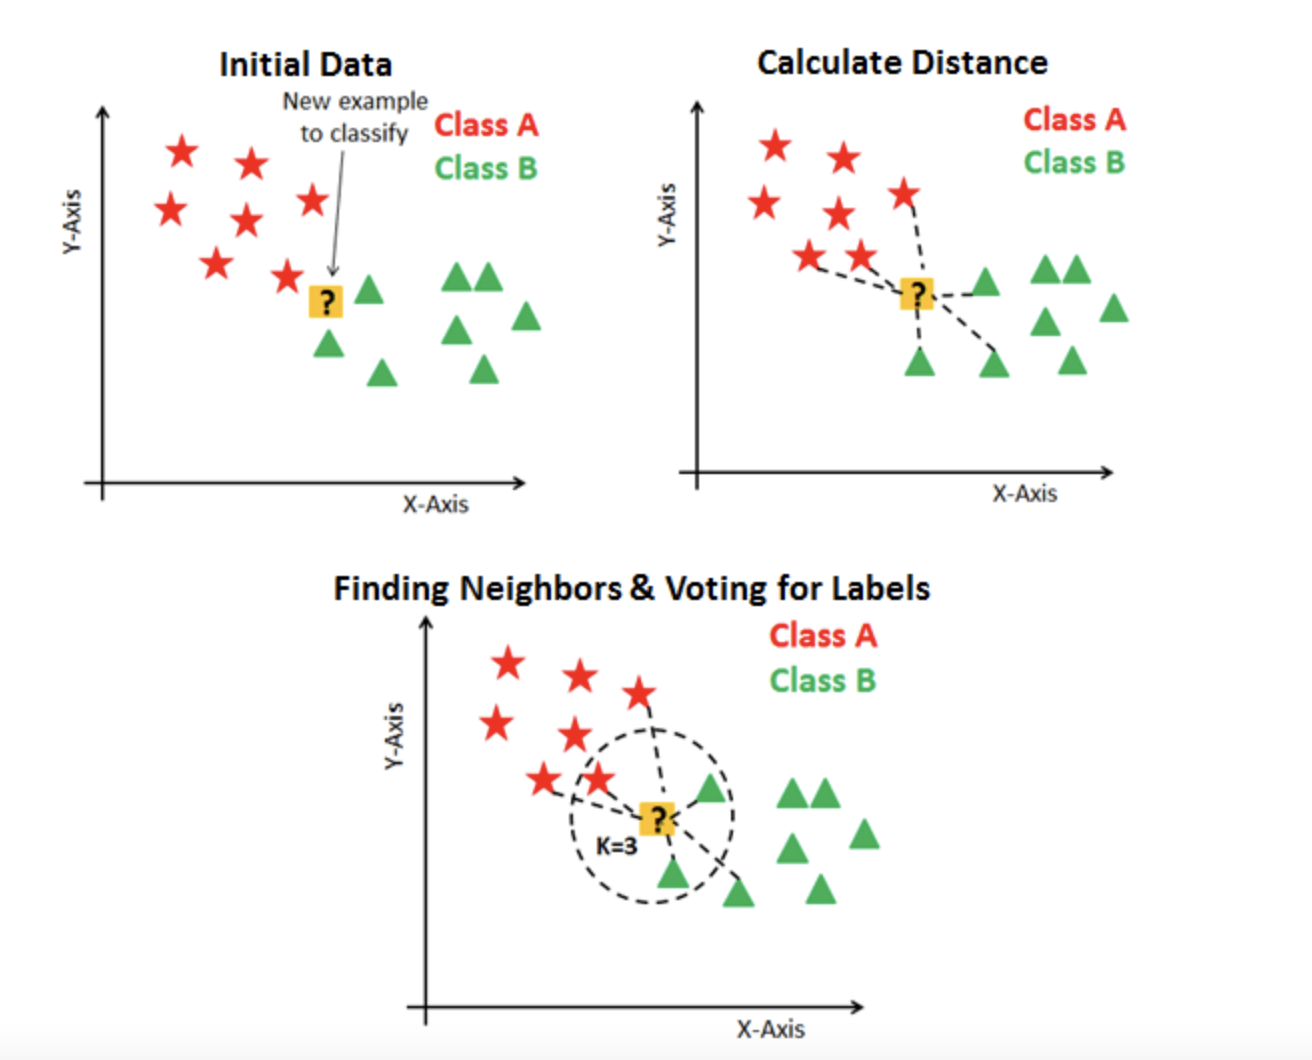

In [ ]:
from scipy.spatial import distance

list_distance = []
v_test = X_test_encoded.toarray()[0]
for v in X_train_encoded.toarray():
    list_distance.append(distance.euclidean(v_test, v))

In [ ]:
list_distance

[2.449489742783178,
 2.449489742783178,
 2.6457513110645907,
 2.23606797749979,
 3.1622776601683795]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model.fit(X_train_encoded, y_train_encoded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = model.predict(X_test_encoded)

In [ ]:
y_pred

array([0])

In [ ]:
le.inverse_transform(y_pred)[0]

'+'